## EDA

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [40]:
df = pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


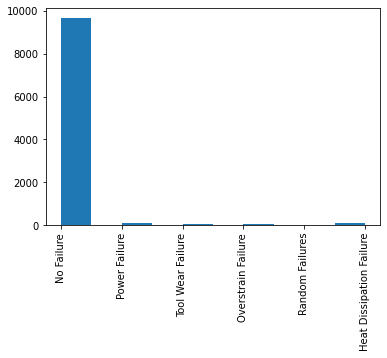

In [3]:
plt.hist(df['Failure Type'])
plt.xticks(rotation = 90)
plt.show()

In [4]:
df.groupby("Failure Type").count()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
Failure Type,,,,,,,,,
Heat Dissipation Failure,112,112,112,112,112,112,112,112,112
No Failure,9652,9652,9652,9652,9652,9652,9652,9652,9652
Overstrain Failure,78,78,78,78,78,78,78,78,78
Power Failure,95,95,95,95,95,95,95,95,95
Random Failures,18,18,18,18,18,18,18,18,18
Tool Wear Failure,45,45,45,45,45,45,45,45,45


In [5]:
no_fail = df.loc[df['Failure Type'] == 'No Failure']
power_fail = df.loc[df['Failure Type'] == 'Power Failure']
random_fail = df.loc[df['Failure Type'] == 'Random Failures']
tool_wear_fail = df.loc[df['Failure Type'] == "Tool Wear Failure"]
overstrain_fail = df.loc[df['Failure Type'] == 'Overstrain Failure']
heat_fail = df.loc[df['Failure Type'] == 'Heat Dissipation Failure']

Type


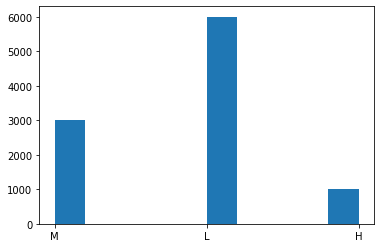

Air temperature [K]


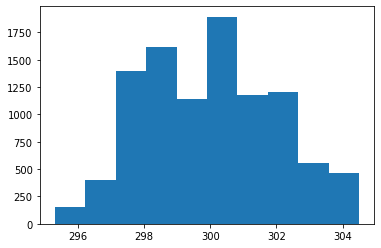

Process temperature [K]


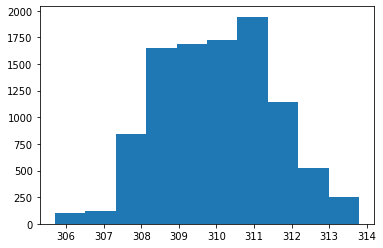

Rotational speed [rpm]


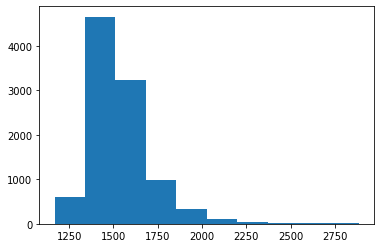

Torque [Nm]


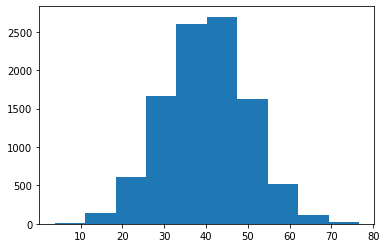

Tool wear [min]


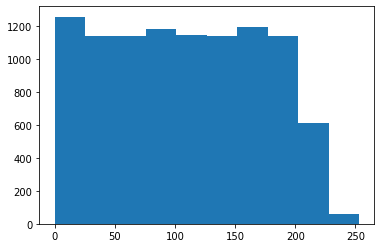

Target


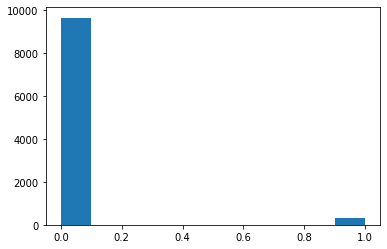

Failure Type


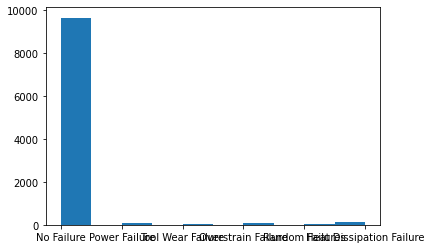

In [6]:
for idx, col in enumerate(list(df.columns)):
  if idx > 1:
    print(col)
    plt.hist(df[col])
    plt.show()


In [7]:
# !pip install pandas-profiling

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [9]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)

In [11]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Creation

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [41]:
df['Type'] = df['Type'].map({'H':1, 'M':2, 'L':3})
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,3,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,3,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,3,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,3,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,2,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,1,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,2,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,1,299.0,308.7,1408,48.5,25,0,No Failure


In [43]:
y = df['Failure Type']
X = df.drop(columns = ['Failure Type', 'Product ID', 'UDI'])

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.67)

In [45]:
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
random_forest = RandomForestClassifier().fit(X_train, y_train)
bagging = BaggingClassifier().fit(X_train, y_train)
boosting = AdaBoostClassifier().fit(X_train, y_train)

In [46]:
models = [decision_tree, random_forest, bagging, boosting]

In [47]:
for model in models:
  print(str(model), accuracy_score(y_test, model.predict(X_test)))

DecisionTreeClassifier() 0.9850746268656716
RandomForestClassifier() 0.9932835820895523
BaggingClassifier() 0.9907462686567164
AdaBoostClassifier() 0.9791044776119403
